In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X = df.iloc[:, [3,4]].values

In [ ]:
X

In [ ]:
from sklearn.cluster import KMeans
wcss = []

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

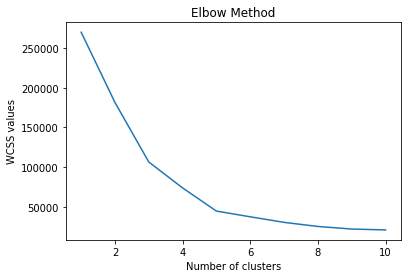

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

In [ ]:
model = KMeans(n_clusters=5, init='k-means++', random_state=0)


In [ ]:
pred = model.fit_predict(X)

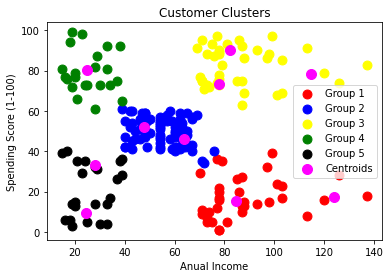

In [ ]:
plt.scatter(X[pred == 0,0], X[pred == 0,1], s=80, c = "red", label="Group 1")
plt.scatter(X[pred == 1,0], X[pred == 1,1], s=80, c = "blue", label="Group 2")
plt.scatter(X[pred == 2,0], X[pred == 2,1], s=80, c = "yellow", label="Group 3")
plt.scatter(X[pred == 3,0], X[pred == 3,1], s=80, c = "green", label="Group 4")
plt.scatter(X[pred == 4,0], X[pred == 4,1], s=80, c = "black", label="Group 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c="magenta", label="Centroids")
plt.title("Customer Clusters")
plt.xlabel("Anual Income")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()